In [1]:
%matplotlib inline
import localgroup
import triangle
import sklearn
from sklearn import mixture
import numpy as np
import pickle
import matplotlib.patches as mpatches

In [37]:
import localgroup.timingargument as tm
from __future__ import division

In [3]:
q_path = '/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/Tr_Q_samp.pickle'
p_path = '/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/Tr_P_samp.pickle'
pe_path = '/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/Tr_PE_samp.pickle'


with open(q_path, 'rb') as f:
    qsamp = pickle.load(f)

with open(p_path, 'rb') as f:
    psamp = pickle.load(f)
    
with open(pe_path, 'rb') as f:
    pesamp = pickle.load(f)

In [31]:
qM, a, x, e = tm.mass(qsamp[:,0], qsamp[:,1])
pM, a, x, e = tm.mass(psamp[:,0], psamp[:,1])
peM, a, x, e = tm.mass(pesamp[:,0], pesamp[:,1])

In [32]:
qgmm_LG = np.power(10,qsamp[:,11])
pgmm_LG = np.power(10,psamp[:,5])
pegmm_LG = np.power(10,pesamp[:,5])

In [34]:
qA = qgmm_LG/qM
pA = pgmm_LG/pM
peA = pegmm_LG/peM

In [36]:
qnorm = qsamp.shape[0]
pnorm = psamp.shape[0]
penorm = pesamp.shape[0]

qnorm, pnorm, penorm

(721, 50572, 91701)

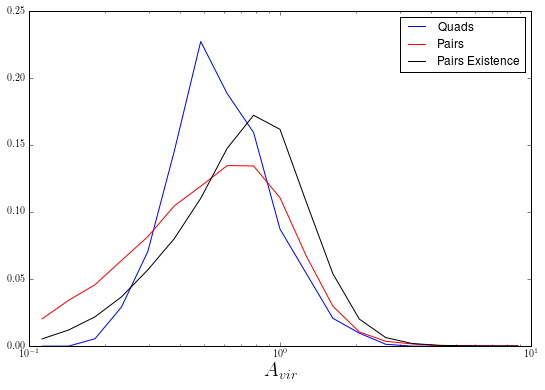

In [59]:
fig, ax = subplots(ncols=1, figsize=(9,6))
y, xed = np.histogram(qA, np.logspace(-1, 1, 20), weights=None)
ax.semilogx(np.sqrt(xed[1:]*xed[:-1]), y/qnorm, label='Quads', color='b')

y, xed = np.histogram(pA, np.logspace(-1, 1, 20), weights=None)
ax.semilogx(np.sqrt(xed[1:]*xed[:-1]), y/pnorm, label='Pairs', color='r')

y, xed = np.histogram(peA, np.logspace(-1, 1, 20), weights=None)
ax.semilogx(np.sqrt(xed[1:]*xed[:-1]), y/penorm, label='Pairs Existence', color='k')


ax.set_xlabel('$A_{vir}$', fontsize=20)
#ax.set_ylabel('fraction of systems', fontsize=16)

ax.legend()

fig.savefig('/afs/slac.stanford.edu/u/ki/mwillia1/Thesis/LocalGroupHaloProps/timing_plot.pdf', dpi=1200)